# Notebook 01: Data Preprocessing & Cleaning

### 1. Objective
The primary objective of this notebook is to prepare the raw Heart Disease UCI dataset for machine learning modeling. This involves handling missing values, encoding categorical variables, scaling numerical features, and conducting an initial Exploratory Data Analysis (EDA) to understand the underlying structure and relationships within the data. A clean, well-structured dataset is the critical foundation for all subsequent analysis and model building.

### 2. Introduction
Data preprocessing is the first and most crucial step in any machine learning pipeline. The quality of the data directly influences the performance of our models. In this phase, we will:
- **Load** the dataset into a Pandas DataFrame for manipulation.
- **Handle Missing Values:** Identify columns with missing data and use imputation strategies to fill them in, preserving as much data as possible.
- **Encode Categorical Variables:** Convert textual or categorical data into a numerical format that machine learning algorithms can understand.
- **Perform EDA:** Use statistical graphics and plots to visualize distributions, correlations, and potential outliers, providing valuable insights into the dataset.
- **Export Cleaned Data:** Save the processed dataset for use in subsequent notebooks.

### 3. Importing Necessary Libraries
```python
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

### 4. Loading and Initial Inspection of Data

In [2]:
df = pd.read_csv("../data/heart+disease/processed.cleveland.data", header=None)
print(df.head())

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


### 5. Assigning Meaningful Column Names

In [3]:
df.columns = [
    "age", "sex", "cp", "trestbps",
    "chol", "fbs","restecg", "thalach",
    "exang", "oldpeak","slope", "ca",
    "thal", "target"
]
print(df)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  target  
0      3.0  0.0  6.0

### 6. Data Type and Missing Value Analysis

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


### 7. Handling Missing Values & Target Column

In [5]:
df = df.replace('?', np.nan)
imputer = SimpleImputer(strategy="most_frequent")
df_imputed = imputer.fit_transform(df)
df = pd.DataFrame(df_imputed, columns=df.columns, index=df.index)
df["target"]=df["target"].apply(lambda x: 1 if x > 0 else 0)
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 8. Ensuring Proper Data Types

In [6]:
df = df.apply(pd.to_numeric, errors='ignore')
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.663366   
std      0.994971   22.8750

C:\Users\engjo\AppData\Local\Temp\ipykernel_16324\2449179996.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


### 9. Exploratory Data Analysis (EDA)

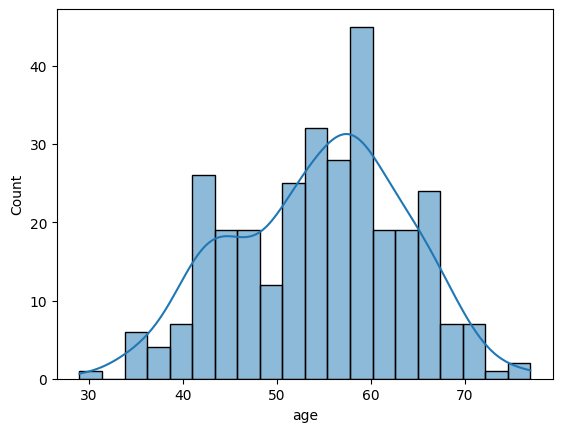

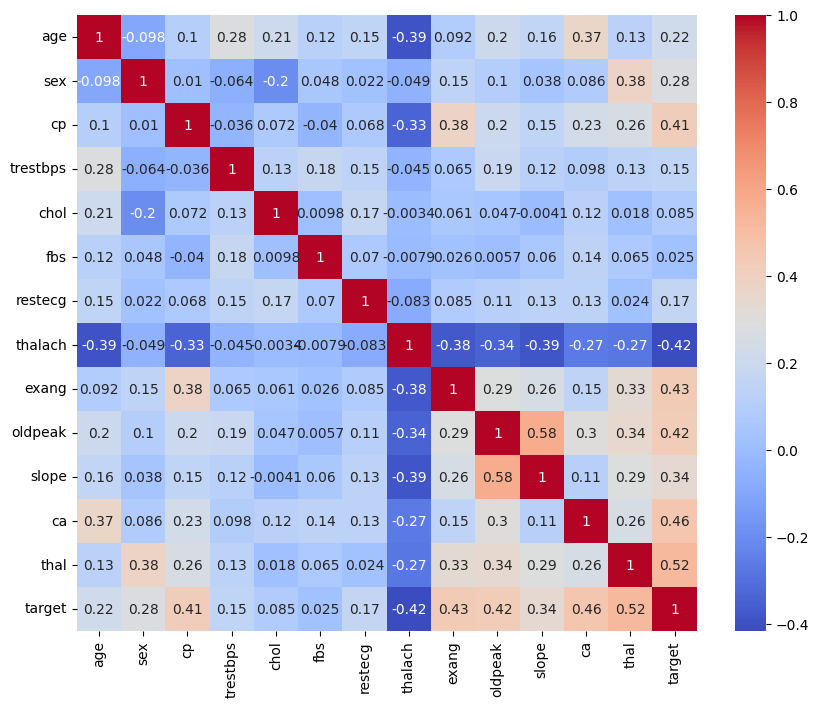

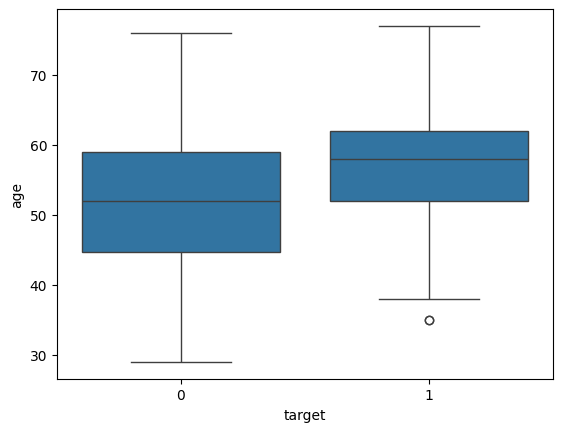

In [7]:
sns.histplot(df['age'], bins=20, kde=True)
plt.show()


plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

sns.boxplot(x="target", y="age", data=df)
plt.show()

### 10. Exporting Cleaned Data

In [8]:
df.to_csv("../data/01_cleaned_data.csv", index=False)